In [1]:
import mne
import numpy as np
from matplotlib import pyplot as plt
from stormdb.access import Query
from pickle import load
from scipy import stats
from mne.datasets import sample
from mne.stats import spatio_temporal_cluster_1samp_test
import os
import os.path as op
import pickle
from copy import deepcopy
from sys import argv
import warnings
from do_stats import do_stats
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
os.environ['ETS_TOOLKIT'] = 'qt4'
os.environ['QT_API'] = 'pyqt5'

proj_name = 'MINDLAB2020_MEG-AuditoryPatternRecognition'
wdir = '/projects/' + proj_name + '/scratch/working_memory/'
data_dir = wdir + 'averages/data/'
subs_dir = '/projects/' + proj_name + '/scratch/fs_subjects_dir/'

sample_path = sample.data_path()
sample_subjects_dir = sample_path + '/subjects'
# src_sample = mne.read_source_spaces(sample_subjects_dir +
#                                 '/fsaverage/bem/fsaverage-vol-5-src.fif')
src_sample = mne.read_source_spaces(subs_dir +
                                'fsaverage/bem/fsaverage-vol-5-src.fif')
#label_file = subs_dir + 'fsaverage/mri/aparc.DKTatlas+aseg.mgz'
label_file = sample_subjects_dir + '/fsaverage/mri/aparc.a2009s+aseg.mgz'

stats_dir = wdir + 'results/stats/'
figures_dir = wdir + 'results/figures/'

    Reading a source space...
    [done]
    1 source spaces read


In [3]:
#Get subjects:
qr = Query(proj_name)
subjects = qr.get_subjects()
subs = range(11,91) #, 27, 28, 29, 30, 31, 32, 33, 34, 35]

In [4]:
all_data = {}
for sidx,s in enumerate(subs):
    try:
        scode = subjects[s-1]
        #dfname = data_dir + scode + '_patterns_imagined_s40_lp4.p'
        dfname = data_dir + scode + '_patterns_imagined_smoothing25_50_hp005.p'
        print('loading file {}'.format(dfname))
        dfile = open(dfname,'rb')
        curdata = load(dfile)
        morph = mne.read_source_morph(subs_dir + scode + '/bem/' + scode + '_vol-morph.h5')
        morph_mat = morph.vol_morph_mat
        for cd in curdata:
            cdata = morph_mat.dot(curdata[cd].data)#deepcopy(cmorphed.data) #morph_mat.dot(c.data)
            print('appending subject {} condition {}'.format(scode,cd))
            all_data.setdefault(cd, np.array([cdata]))
            #all_data[cd][cd2].append([cdata])
            if sidx > 0:
                all_data[cd] = np.vstack((all_data[cd],np.array([cdata])))
    except Exception as e:
        print(e)
        continue

loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0011_U7X_patterns_imagined_smoothing25_50_hp005.p
appending subject 0011_U7X condition main_delay
appending subject 0011_U7X condition inv_delay
appending subject 0011_U7X condition main_fmel
appending subject 0011_U7X condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0012_VK2_patterns_imagined_smoothing25_50_hp005.p
appending subject 0012_VK2 condition main_delay
appending subject 0012_VK2 condition inv_delay
appending subject 0012_VK2 condition main_fmel
appending subject 0012_VK2 condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0013_NHJ_patterns_imagined_smoothing25_50_hp005.p
appending subject 0013_NHJ condition main_delay
appending subject 0013_NHJ condition inv_delay
appending subject 0013_NHJ condition main_fmel
appending subject 0013_

appending subject 0035_FTI condition main_delay
appending subject 0035_FTI condition inv_delay
appending subject 0035_FTI condition main_fmel
appending subject 0035_FTI condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0036_9EA_patterns_imagined_smoothing25_50_hp005.p
appending subject 0036_9EA condition main_delay
appending subject 0036_9EA condition inv_delay
appending subject 0036_9EA condition main_fmel
appending subject 0036_9EA condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0037_KPS_patterns_imagined_smoothing25_50_hp005.p
appending subject 0037_KPS condition main_delay
appending subject 0037_KPS condition inv_delay
appending subject 0037_KPS condition main_fmel
appending subject 0037_KPS condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0038_J7W_patterns_imagined_

appending subject 0059_CYC condition inv_delay
appending subject 0059_CYC condition main_fmel
appending subject 0059_CYC condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0060_KDJ_patterns_imagined_smoothing25_50_hp005.p
appending subject 0060_KDJ condition main_delay
appending subject 0060_KDJ condition inv_delay
appending subject 0060_KDJ condition main_fmel
appending subject 0060_KDJ condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0061_NMF_patterns_imagined_smoothing25_50_hp005.p
appending subject 0061_NMF condition main_delay
appending subject 0061_NMF condition inv_delay
appending subject 0061_NMF condition main_fmel
appending subject 0061_NMF condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0062_WKJ_patterns_imagined_smoothing25_50_hp005.p
appending subject 0062_WK

appending subject 0083_B62 condition main_fmel
appending subject 0083_B62 condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0084_DZM_patterns_imagined_smoothing25_50_hp005.p
appending subject 0084_DZM condition main_delay
appending subject 0084_DZM condition inv_delay
appending subject 0084_DZM condition main_fmel
appending subject 0084_DZM condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0085_EDC_patterns_imagined_smoothing25_50_hp005.p
appending subject 0085_EDC condition main_delay
appending subject 0085_EDC condition inv_delay
appending subject 0085_EDC condition main_fmel
appending subject 0085_EDC condition inv_fmel
loading file /projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0086_HBD_patterns_imagined_smoothing25_50_hp005.p
appending subject 0086_HBD condition main_delay
appending subject 0086_H

In [5]:
print(all_data[cd].shape)

(72, 14343, 68)


In [6]:
grand_avg = {}
for cd in all_data:
    grand_avg[cd] = deepcopy(morph.apply(curdata['main_delay']))
    #grand_avg[b][cd].subject = 'sample'
    grand_avg[cd].data = np.mean(all_data[cd],0)
    grand_avg[cd].tmin = -0.25
    grand_avg[cd].tstep = 0.025
    print(grand_avg[cd].data.shape)

(14343, 88)
(14343, 88)
(14343, 68)
(14343, 68)


In [7]:
adjacency = mne.spatial_src_adjacency(src_sample)

-- number of adjacent vertices : 14343


In [8]:
stats_results = {}
for cd in all_data:
    stats_results[cd] = do_stats(all_data[cd], method='FDR', adjacency=adjacency)


Performing FDR correction
.

Performing FDR correction
.

Performing FDR correction
.

Performing FDR correction
.


-0.25
main_delay (-0.25 0.0):
Showing: t = -0.112 s, (40.0, -45.0, -30.0) mm, [24, 14, 9] vox, 12069 vertex
Using control points [1.31442834 1.94268179 4.41841403]


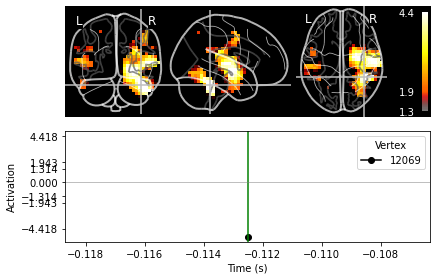

main_delay (0.0 0.25):
Showing: t = 0.138 s, (60.0, -10.0, 10.0) mm, [28, 21, 17] vox, 22600 vertex
Using control points [2.16108558 2.63797061 4.56848219]


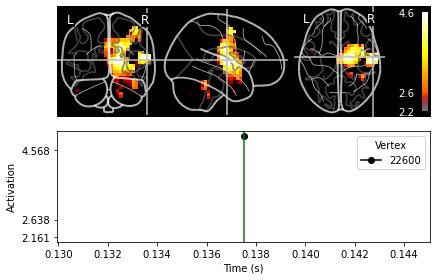

main_delay (0.25 0.5):
Showing: t = 0.388 s, (10.0, -10.0, 5.0) mm, [18, 21, 16] vox, 21303 vertex
Using control points [3.1355981  3.61563902 5.15882928]


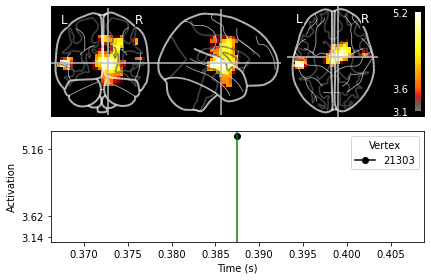

main_delay (0.5 0.75):
Showing: t = 0.637 s, (5.0, -15.0, 5.0) mm, [17, 20, 16] vox, 21269 vertex
Using control points [4.53205976 5.06230163 7.89458519]


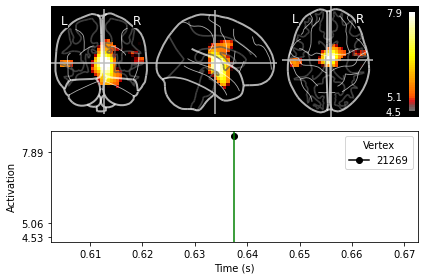

main_delay (0.75 1.0):
Showing: t = 0.887 s, (10.0, -15.0, 5.0) mm, [18, 20, 16] vox, 21270 vertex
Using control points [3.29677162 3.99611784 6.98763808]


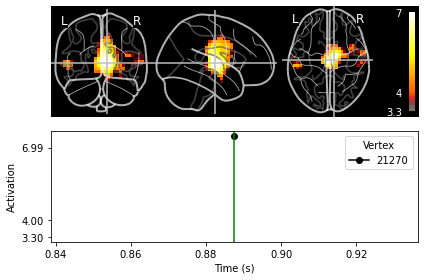

main_delay (1.0 1.25):
Showing: t = 1.137 s, (0.0, -10.0, 5.0) mm, [16, 21, 16] vox, 21301 vertex
Using control points [2.47328175 3.19944007 6.54799153]


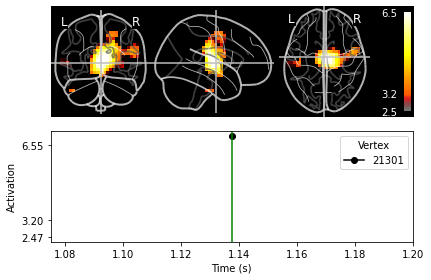

main_delay (1.25 1.5):
Showing: t = 1.387 s, (0.0, -10.0, 10.0) mm, [16, 21, 17] vox, 22588 vertex
Using control points [3.11283733 3.79341784 6.5487719 ]


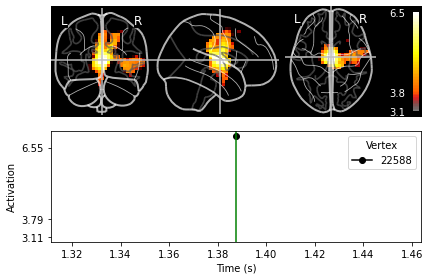

main_delay (1.5 1.75):
Showing: t = 1.637 s, (0.0, -15.0, 5.0) mm, [16, 20, 16] vox, 21268 vertex
Using control points [1.57626397 2.24821791 4.95465961]


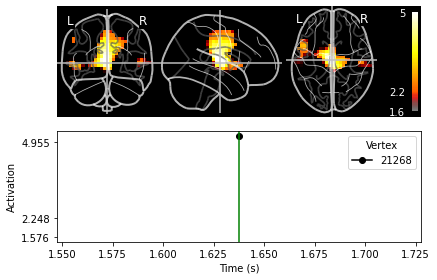

-0.25
inv_delay (-0.25 0.0):
Showing: t = -0.112 s, (65.0, -30.0, 30.0) mm, [29, 17, 21] vox, 27617 vertex
Using control points [1.09703678 1.75967079 4.07444446]


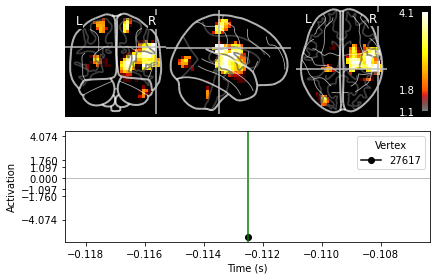

inv_delay (0.0 0.25):
Showing: t = 0.138 s, (15.0, -15.0, 10.0) mm, [19, 20, 17] vox, 22558 vertex
Using control points [1.27664364 1.71007528 4.11383425]


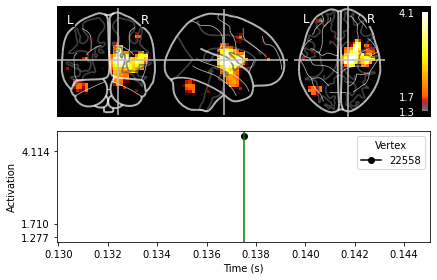

inv_delay (0.25 0.5):
Showing: t = 0.388 s, (-65.0, -20.0, 5.0) mm, [3, 19, 16] vox, 21222 vertex
Using control points [2.05561147 2.6079875  4.50184416]


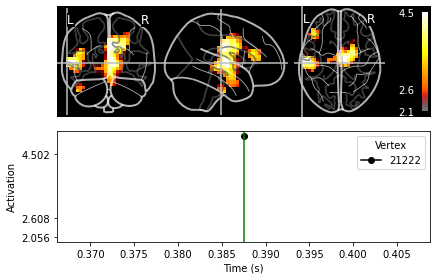

inv_delay (0.5 0.75):
Showing: t = 0.637 s, (-65.0, -20.0, 5.0) mm, [3, 19, 16] vox, 21222 vertex
Using control points [3.32896027 3.8775567  5.56157471]


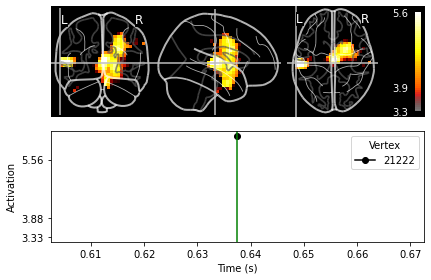

inv_delay (0.75 1.0):
Showing: t = 0.887 s, (5.0, -10.0, 5.0) mm, [17, 21, 16] vox, 21302 vertex
Using control points [3.65127801 4.23276731 5.69943376]


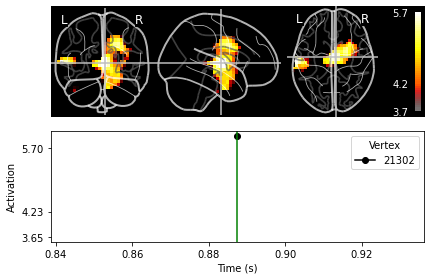

inv_delay (1.0 1.25):
Showing: t = 1.137 s, (5.0, -15.0, 5.0) mm, [17, 20, 16] vox, 21269 vertex
Using control points [2.87906031 3.6040629  6.25652796]


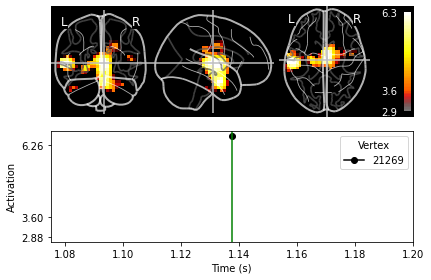

inv_delay (1.25 1.5):
Showing: t = 1.387 s, (0.0, -20.0, 15.0) mm, [16, 19, 18] vox, 23809 vertex
Using control points [2.1149414  2.88691464 5.65036706]


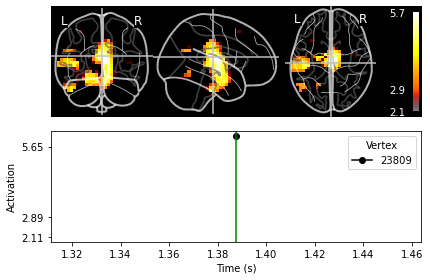

inv_delay (1.5 1.75):
Showing: t = 1.637 s, (0.0, -20.0, 10.0) mm, [16, 19, 17] vox, 22522 vertex
Using control points [1.16723633 1.70939843 5.58021027]


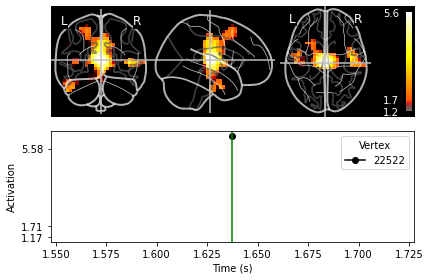

-0.25
main_fmel (-0.25 0.0):
Showing: t = -0.112 s, (5.0, -0.0, 40.0) mm, [17, 23, 23] vox, 30377 vertex
Using control points [2.53850577 3.3141406  5.15712963]


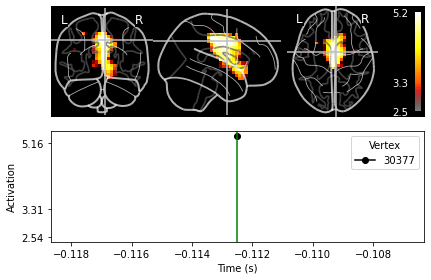

main_fmel (0.0 0.25):
Showing: t = 0.138 s, (10.0, 35.0, -15.0) mm, [18, 30, 12] vox, 16452 vertex
Using control points [1.33631224 1.44741835 2.01677783]


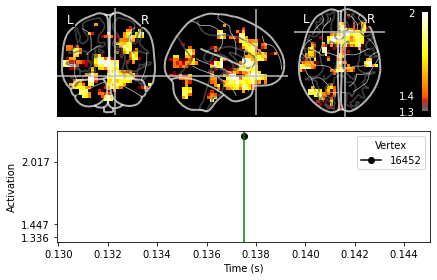

main_fmel (0.25 0.5):
Showing: t = 0.388 s, (-5.0, -15.0, 30.0) mm, [15, 20, 21] vox, 27702 vertex
Using control points [2.73958013 3.26406806 5.50123454]


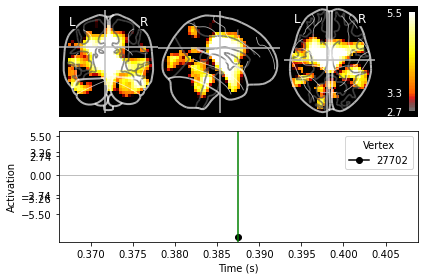

main_fmel (0.5 0.75):
Showing: t = 0.637 s, (-5.0, -15.0, 10.0) mm, [15, 20, 17] vox, 22554 vertex
Using control points [1.16698518 1.50955448 3.98951764]


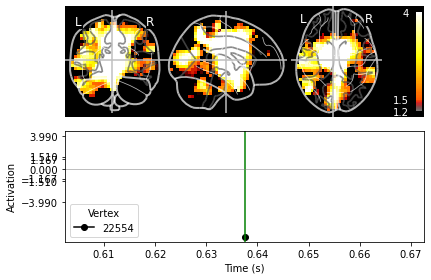

main_fmel (0.75 1.0):
Showing: t = 0.887 s, (-5.0, -10.0, 15.0) mm, [15, 21, 18] vox, 23874 vertex
Using control points [2.49002504 2.93869378 4.45595279]


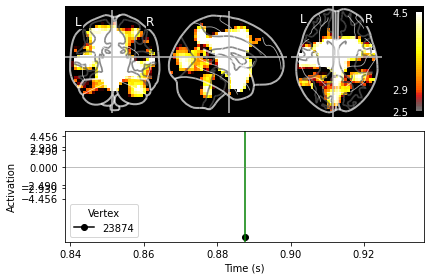

main_fmel (1.0 1.25):
Showing: t = 1.137 s, (-5.0, -10.0, 10.0) mm, [15, 21, 17] vox, 22587 vertex
Using control points [1.27993199 1.63058063 2.81213112]


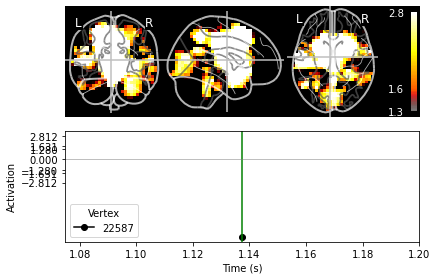

main_fmel (1.25 1.5):
Showing: t = 1.350 s, (0.0, -5.0, 5.0) mm, [16, 22, 16] vox, 21334 vertex
Using control points [1.33321333 2.02541989 4.06052141]


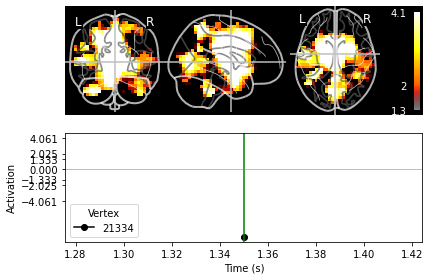

main_fmel (1.5 1.75):


ValueError: No samples remain when using tmin=1.5 and tmax=1.75 (original time bounds are [-0.25, 1.425])

In [15]:
crop_times = np.arange(-0.25,2,0.25)
for p in stats_results:
    print(grand_avg[p].tmin)
    for tidx, t in enumerate(crop_times):        
        if tidx < (len(crop_times) - 1):
            t2 = crop_times[tidx + 1]
            print('{} ({} {}):'.format(p, t, t2) )
            cdata = grand_avg[p].copy()
            cdata.data = stats_results[p]['tvals'].T * stats_results[p]['mask'].T 
            cdata.copy().crop(t,t2).mean().plot(src = src_sample, subjects_dir = subs_dir, mode = 'glass_brain',#'glass_brain',#'glass_brain',#initial_time = 1.75,
                              initial_pos = None)#[.007,.05,.023])

In [ ]:
for p in stats_results:
    print(p)
    cdata = grand_avg[p].copy()
    cdata.data = stats_results[p]['tvals'] * stats_results[p]['mask'] 
    cdata.mean().plot(src = src_sample, subjects_dir = subs_dir, mode = 'glass_brain')#'glass_brain')#[.007,.05,.023])    

In [ ]:
crop_times = np.arange(-0.5,2.5,0.5)
for p in grand_avg:
    print(grand_avg[p].tmin)
    for tidx, t in enumerate(crop_times):        
        if tidx < (len(crop_times) - 1):
            t2 = crop_times[tidx + 1]
            print('{} ({} {}):'.format(p, t, t2) )
            grand_avg[p].copy().crop(t,t2).mean().plot(src = src_sample, subjects_dir = subs_dir, mode = 'stat_map',#'glass_brain',#'glass_brain',#initial_time = 1.75,
                              initial_pos = None)#[.007,.05,.023])

main_delay
Fixing initial position: [5.0, -5.0, 5.0] mm
Showing: t = 0.850 s, (5.0, -5.0, 5.0) mm, [17, 22, 16] vox, 21335 vertex


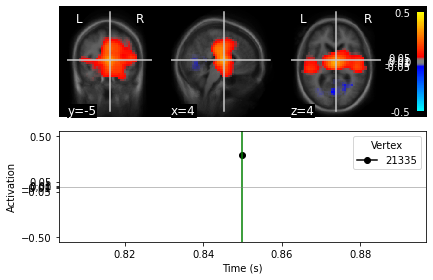

inv_delay
Fixing initial position: [5.0, -5.0, 5.0] mm
Showing: t = 0.850 s, (5.0, -5.0, 5.0) mm, [17, 22, 16] vox, 21335 vertex


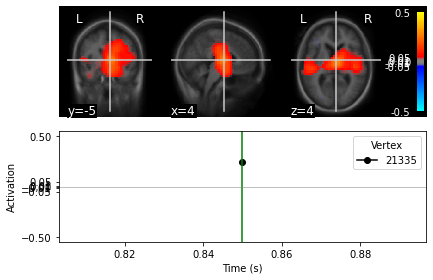

main_fmel
Fixing initial position: [5.0, -5.0, 5.0] mm
Showing: t = 0.600 s, (5.0, -5.0, 5.0) mm, [17, 22, 16] vox, 21335 vertex


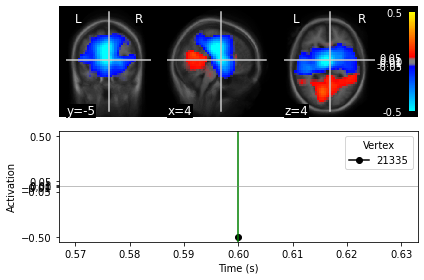

inv_fmel
Fixing initial position: [5.0, -5.0, 5.0] mm
Showing: t = 0.600 s, (5.0, -5.0, 5.0) mm, [17, 22, 16] vox, 21335 vertex


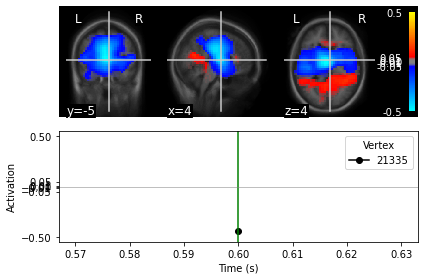

In [12]:
coords = [[.005,-.005,.005]]
for p in grand_avg:
    print(p)
    cdata = grand_avg[p].copy()
    cdata.data = stats_results[p]['data_mean'].T * stats_results[p]['mask'].T 
    for c in coords:
        cdata.mean().plot(src = src_sample, subjects_dir = subs_dir, mode = 'stat_map', initial_pos=c,
                                clim = {'kind': 'value', 'pos_lims': [0.01,0.05,0.5]})#'glass_brain')#[.007,.05,.023])
    

In [ ]:
ts = [0.3,1.3]
for p in grand_avg:
    for t in ts:
        print(grand_avg[p].tmin)
        print('{} ({}):'.format(p, t) )
        cdata = grand_avg[p].copy()
        cdata.data = stats_results[p]['data_mean'].T * stats_results[p]['mask'].T 
        cdata.plot(src = src_sample, subjects_dir = subs_dir, mode = 'stat_map',#initial_pos=[.005,-.005,.005], #stat_map',#'glass_brain',#'glass_brain',#initial_time = 1.75,
                                  initial_time = t, clim = {'kind': 'value', 'pos_lims': [0.001,0.05,0.6]})#[.007,.05,.023])

In [9]:
## Plot regions of interest.
labels = mne.get_volume_labels_from_aseg(label_file)

In [10]:
for l in labels:
    print(l)

Unknown
Left-Cerebral-White-Matter
Left-Lateral-Ventricle
Left-Inf-Lat-Vent
Left-Cerebellum-White-Matter
Left-Cerebellum-Cortex
Left-Thalamus-Proper
Left-Caudate
Left-Putamen
Left-Pallidum
3rd-Ventricle
4th-Ventricle
Brain-Stem
Left-Hippocampus
Left-Amygdala
CSF
Left-Accumbens-area
Left-VentralDC
Left-vessel
Left-choroid-plexus
Right-Cerebral-White-Matter
Right-Lateral-Ventricle
Right-Inf-Lat-Vent
Right-Cerebellum-White-Matter
Right-Cerebellum-Cortex
Right-Thalamus-Proper
Right-Caudate
Right-Putamen
Right-Pallidum
Right-Hippocampus
Right-Amygdala
Right-Accumbens-area
Right-VentralDC
Right-vessel
Right-choroid-plexus
WM-hypointensities
Optic-Chiasm
CC_Posterior
CC_Mid_Posterior
CC_Central
CC_Mid_Anterior
CC_Anterior
ctx_lh_G_and_S_frontomargin
ctx_lh_G_and_S_occipital_inf
ctx_lh_G_and_S_paracentral
ctx_lh_G_and_S_subcentral
ctx_lh_G_and_S_transv_frontopol
ctx_lh_G_and_S_cingul-Ant
ctx_lh_G_and_S_cingul-Mid-Ant
ctx_lh_G_and_S_cingul-Mid-Post
ctx_lh_G_cingul-Post-dorsal
ctx_lh_G_cingul-Po

In [25]:
clabels = ['Left-Thalamus-Proper',
           'Right-Thalamus-Proper',
           #'Left-Caudate',
           #'Right-Caudate',
           'ctx_lh_G_and_S_cingul-Ant',
           'ctx_rh_G_and_S_cingul-Ant',
           'ctx_lh_G_and_S_cingul-Mid-Ant',
           'ctx_rh_G_and_S_cingul-Mid-Ant',
           'ctx_lh_G_and_S_cingul-Mid-Post',
           'ctx_rh_G_and_S_cingul-Mid-Post',
           'ctx_lh_G_temp_sup-G_T_transv',
           'ctx_rh_G_temp_sup-G_T_transv',
           'ctx_lh_G_temp_sup-Lateral',
           'ctx_rh_G_temp_sup-Lateral']

stc_labels = {}
se_labels = {}
for c in grand_avg:
    cdata = grand_avg[c].copy()
    sedata = grand_avg[c].copy()
    cdata.data = stats_results[c]['data_mean'].T #* stats_results[c]['mask'].T
    sedata.data = stats_results[c]['data_sd'].T / np.sqrt(stats_results[c]['n']) #* stats_results[c]['mask'].T
    stc_labels[c] = cdata.extract_label_time_course(labels = [label_file,clabels], src = src_sample, mode = 'auto')
    se_labels[c] = sedata.extract_label_time_course(labels = [label_file,clabels], src = src_sample, mode = 'auto')

Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
12/12 atlas regions had at least one vertex in the source space
Extracting time courses for 12 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
12/12 atlas regions had at least one vertex in the source space
Extracting time courses for 12 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
12/12 atlas regions had at least one vertex in the source space
Extracting time courses for 12 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
12/12 atlas regions had at least one vertex in the source space
Extracting time courses for 12 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
12/12 atlas regions had at least one vertex in the sour

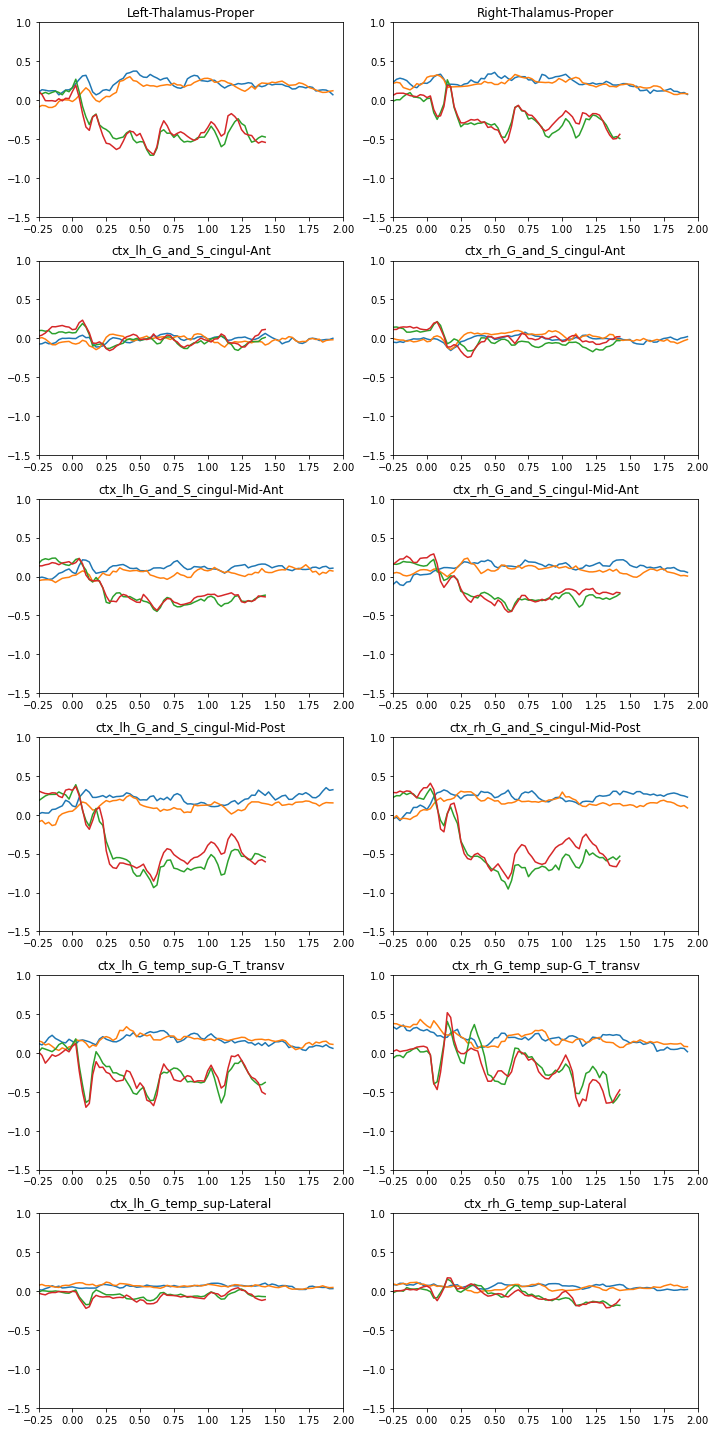

In [20]:
fig, axes = plt.subplots(ncols=2,nrows=6, figsize = (10,20))
for lidx, l in enumerate(stc_labels['main_fmel']):
    rix, cix = lidx//2,lidx%2
    for sl in stc_labels:
        times = grand_avg[sl].times 
        axes[rix,cix].plot(times,stc_labels[sl][lidx])
    axes[rix, cix].set_title(clabels[lidx])
    axes[rix, cix].set_ylim(-1.5,1,5)    
    axes[rix, cix].set_xlim(-.25,2)    
plt.tight_layout()

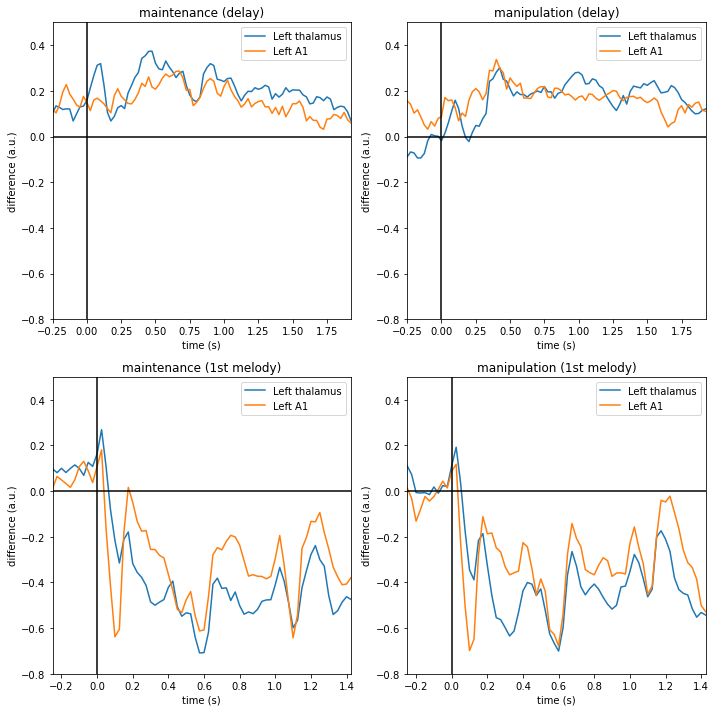

In [18]:
times = grand_avg['main_fmel'].times 
cur_labs = ['Left thalamus','Left A1']
titles = ['maintenance (delay)', 'manipulation (delay)','maintenance (1st melody)','manipulation (1st melody)']
conds = ['inv_fmel','inv_delay']
fig, axes = plt.subplots(ncols=2,nrows=2, figsize = (10,10))
for sidx, sl in enumerate(stc_labels):
    times = grand_avg[sl].times 
    rix, cix = sidx//2,sidx%2
    for lidx in range(len(stc_labels[sl])):
        if lidx in [0,8]:
            axes[rix,cix].plot(times,stc_labels[sl][lidx])
    axes[rix, cix].set_title(titles[sidx])
    axes[rix, cix].set_ylim(-.8,.5)
    axes[rix, cix].set_xlim(times[0],times[-1])
    axes[rix, cix].set_xlabel('time (s)')
    axes[rix, cix].set_ylabel('difference (a.u.)')
    axes[rix, cix].axhline(0., color='k')
    axes[rix, cix].axvline(0., color='k')
    #axes[rix, cix].legend([clabels[cls] for cls in [0,8]])
    axes[rix, cix].legend(cur_labs)
plt.tight_layout()
plt.savefig(figures_dir + 'pattern_sources_labels_lh.pdf',orientation='portrait')

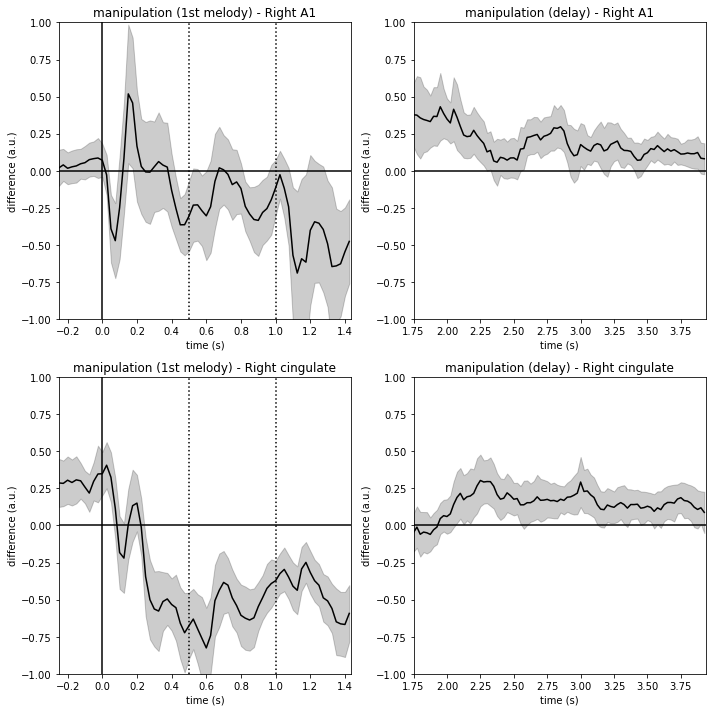

In [32]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize = (10,10))
cur_labs = ['Right A1','Right cingulate']
lab_ix = [9,7]
conds = ['inv_fmel','inv_delay']
titles = ['manipulation (1st melody)','manipulation (delay)']
sidx = -1
for lx, lab in enumerate(lab_ix):
    lidx = lab_ix[lx]
    for slx, sl in enumerate(conds):
        sidx += 1
        times = grand_avg[sl].times.copy()
        if sl == 'inv_delay':
            times = times + 2 
        rix, cix = sidx//2,sidx%2
        ci_upper = stc_labels[sl][lidx] + 1.96*se_labels[sl][lidx]
        ci_lower = stc_labels[sl][lidx] - 1.96*se_labels[sl][lidx]
        axes[rix, cix].fill_between(times, ci_lower, ci_upper, color='k', alpha=.2)
        axes[rix,cix].plot(times,stc_labels[sl][lidx],color = 'k')
        axes[rix, cix].set_title(titles[slx] + ' - ' + cur_labs[lx])
        axes[rix, cix].set_ylim(-1,1)
        axes[rix, cix].set_xlim(times[0],times[-1]+0.01)
        axes[rix, cix].set_xlabel('time (s)')
        axes[rix, cix].set_ylabel('difference (a.u.)')
        axes[rix, cix].axhline(0., color='k')
        axes[rix, cix].axvline(0., color='k')        
        if sl == 'inv_fmel':
            axes[rix, cix].axvline(.5, color='k',linestyle=':')
            axes[rix, cix].axvline(1, color='k',linestyle=':')
        if sl == 'inv_delay':
            axes[rix, cix].axvline(2, color='k',linestyle='--')
        #axes[rix, cix].legend([clabels[cls] for cls in [1,9]])
        #axes[rix, cix].legend(cur_labs)
plt.tight_layout()
plt.savefig(figures_dir + 'pattern_sources_labels_rh.pdf',orientation='portrait')

In [ ]:
import statsmodels.api as sm

In [ ]:
reg_ix = [0,1,8,9]
ccor = {}
for cd in stc_labels:
    ccor[cd] = {}
    for a1 in reg_ix:
        for a2 in reg_ix:
            if a2 > a1:  
                cur_cmp = clabels[a1] + ' ' + clabels[a2]
                print(cur_cmp)
                ccor[cd][cur_cmp] = np.correlate(stc_labels[cd][a1],
                                                         stc_labels[cd][a2],
                                                         'full')

In [ ]:
lags = np.arange(-len(times)+1,len(times))*0.02
plt.plot(lags,ccor['inv_delay']['Right-Thalamus-Proper ctx_rh_G_temp_sup-G_T_transv'])